<a href="https://colab.research.google.com/github/hank199599/data_science_from_scratch_reading_log/blob/main/Chapter11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 模型化

## 模型(model)
在不同變數之間，存在數學(或機率)關係的某種**規格規範(specification)**

# 機器學習的定義
自資料學習而得的模型，故被稱為**預測模型化(predictive modeling)**或 **資料探勘(data mining)**。 
  
機器學習的種類：
* 監督式模型(supervised)：資料已標示正確答案
* 無監督式模型(unsupervised)：資料未標示正確答案
* 半監督式模型(semi-supervised)：只有部分資料標示正確答案
* 線上模型(online)：需針對新資料持續進行調整
* 強化模型(reinforcement)：在進行一系列預測後得到一個**訊號**說明他做得多好




## 過度套入 (overfitting)
製作出來的模型隊訓練資料而言非常完美，但面對任何新資料的表現卻十分遜色

## 套入不足 (underfitting)
此種模型即是面對訓練用資料表現也鋪怎麼樣

### 圖 11-1 過度套入與套入不足
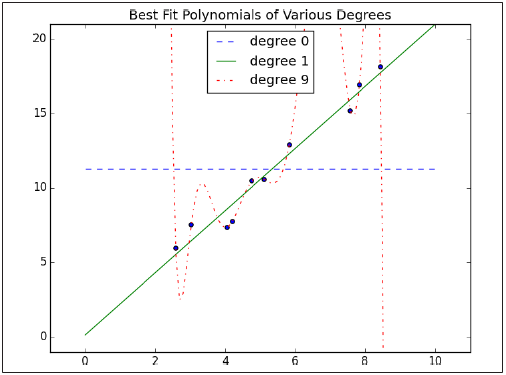

In [12]:
import random
from typing import TypeVar,List,Tuple
X=TypeVar('X') #以通用型別來代表資料點

def split_data(data:List[X],prob:float) ->Tuple[List[X],List[X]]:
  """把資料依照[prob,1-prob]的比率進行切割"""
  data = data[:]        #複製一份資料
  random.shuffle(data)      #因shuffle會打亂資料
  cut = int(len(data)*prob)   #用prob算出切分點
  return data[:cut],data[cut:]  #用打亂過的資料進行切分

In [13]:
data = [n for n in range(1000)]
train,test = split_data(data,0.75)

#比例應該是正確的
assert len(train) == 750
assert len(test) == 250

#原資料應該還是保存得很好
assert sorted(train+test) == data

In [14]:
Y = TypeVar('Y') #以通用型別來表示輸出變數

def train_test_split(xs:List[X],ys:List[Y],test_pct:float)->Tuple[List[X],List[X],List[Y],List[Y]]:

  #生成索引並進行切分
  idxs = [i for i in range(len(xs))]
  train_idxs,test_idxs = split_data(idxs,1-test_pct)

  return ([xs[i] for i in train_idxs], #x_train
       [xs[i] for i in test_idxs], #x_test
       [ys[i] for i in train_idxs], #y_train
       [ys[i] for i in test_idxs]) #y_test
       

In [15]:
xs = [x for x in range(1000)]
ys = [2*x for x in xs]
x_train,x_test,y_train,y_test=train_test_split(xs,ys,0.25)

#檢查比例是否正確
assert len(x_train) == len(y_train) == 750
assert len(x_test) == len(y_test) == 250

#檢查相應資料點都有正確配對
assert all(y==2*x for x,y in zip(x_train,y_train))
assert all(y==2*x for x,y in zip(x_test,y_test))



```python
model = SomekindOfModel()
x_train,x_test,y_train,y_test=train_test_split(xs,ys,0.33)
model.train(x_train,y_train
performance = model.test(x_test,y_test)
```
1. 訓練：來建立多個模型
2. 驗證：以資料來選擇模型
3. 測試：判斷最終模型是否可用


# 正確性

|---|實際為真|實際為假|  
|---|---|---|
|預測為真| 真陽性|偽陽性
|預測為假| 偽陰性|真陰性

每個資料可以被歸類為四種分類中的其中一種
* 真陽性(TP,true positive)
* 假陽性(FP,false positive)
* 假陰性(FN,false negative)
* 真陰性(TN,true negative)




 

## 正確度(accuracy)
預測正確的比率


```
accuracy = TP+TN/total
```



In [33]:
def accuracy(tp:int,fp:int,fn:int,tn:int)->float:
  correct = tp + tn
  total = tp + fp + fn + tn
  return correct/total

## 精確率(precision)
所有預測為陽性的結果中，預測正確的比率


```
precision = TP/TP+FP
```



In [21]:
def precision(tp:int,fp:int,fn:int,tn:int)->float:
  return tp/(tp+fp)

## 召回率(recall)
所有真實陽性結果中，被預測正確的比率


```
recall = TP/TP+FN
```



In [18]:
def recall(tp:int,fp:int,fn:int,tn:int)->float:
  return tp/(tp+fn)

## F1 分數(F1 score)
利用精確率與召回率計算出的評量分數


```
recall = 2*precision*recall/(precision+recall)
```
也可以被視為精確率與召回率的[調和平均數](https://en.wikipedia.org/wiki/Harmonic_mean),  其值必位於精確率與召回率之間


In [22]:
def f1_score(tp:int,fp:int,fn:int,tn:int)->float:
  p =precision(tp,fp,fn,tn)
  r =recall(tp,fp,fn,tn)

  return 2*p*r/(p+r)

### 範例：罹患白血病機率

|---|罹患白血病|未罹患白血病|總計|
|---|---|---|---|
|名字是Luke| 70 (TP)|4,930(FP)|5,000
|名字不是Luke| 13930(FN)|981,070(TN)|995,000
|總計| 14,000|986,000|1,000,000

In [28]:
tp = 70
fp = 4930
fn = 13930
tn = 981070

正確度(accuracy)

In [34]:
accuracy(tp,fp,fn,tn)

0.98114

精確率(precision)

In [30]:
precision(tp,fp,fn,tn)

0.014

召回率(recall)

In [26]:
recall(tp,fp,fn,tn)

0.005

F1 分數(F1 score)

In [27]:
f1_score(tp,fp,fn,tn)

0.00736842105263158

## 偏差與變異

* 偏差 (bias)
* 變異 (variance)

在模型中，如果：
* 無論採取哪種訓練資料都會出現錯誤→有較高的偏差
* 若任兩組隨機選擇的訓練資料會得出類似的模型→有較低的變異
* 偏差很高：可以加入一些特徵項
* 變異很高：可以移除一些特徵項，或取得更多資料

### 圖 11-2 用更多資料來降低維度
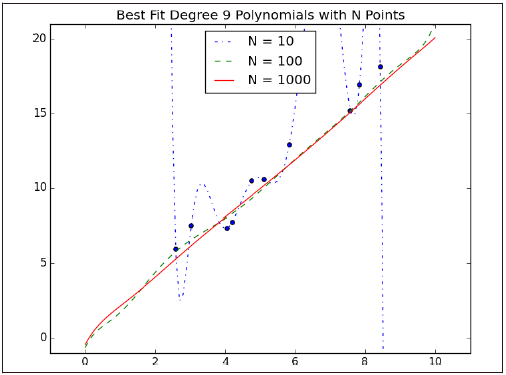

## 特徵的提取與選擇

## 特徵項
提供給模型的任何一種輸入項


## 如何選擇特徵項
結合**經驗**和**專業領域素養**
